# Team_Project

In [6]:
setwd('D:/workspace/R_Practice/data/R_data')

In [7]:
getwd()

[1] "D:/workspace/R_Practice/data/R_data"

In [167]:
library('dplyr')
library('ggplot2')
library('car')

In [234]:
data = read.csv('sales_data_1.csv')
head(data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [235]:
fruit_data = data %>%
                filter(CATEGORY == '과즙음료')
vitamin_data = data %>%
                filter(CATEGORY == '비타민음료')
tea_data = data %>%
            filter(CATEGORY == '차음료')
head(fruit_data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [187]:
fruit_model = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(fruit_model)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-494.17 -125.23  -11.88   91.29  582.96 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.685e+05  1.483e+05  -2.485 0.016205 *  
YM           1.825e+00  7.392e-01   2.469 0.016881 *  
ITEM_CNT     1.841e+01  4.954e+00   3.717 0.000493 ***
PRICE        3.442e-01  1.426e-01   2.413 0.019365 *  
MAXTEMP      5.438e+01  3.929e+00  13.840  < 2e-16 ***
SALEDAY      1.213e-03  2.611e-03   0.465 0.644188    
RAIN_DAY    -1.278e-02  3.815e-03  -3.350 0.001513 ** 
HOLIDAY      3.963e+01  2.335e+01   1.697 0.095638 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207.9 on 52 degrees of freedom
Multiple R-squared:  0.9041,	Adjusted R-squared:  0.8912 
F-statistic: 70.07 on 7 and 52 DF,  p-value: < 2.2e-16


In [188]:
vif(fruit_model)

YM  ITEM_CNT     PRICE   MAXTEMP   SALEDAY  RAIN_DAY   HOLIDAY 
15.184475  3.197365  3.590296  2.002477 16.831974  2.080314  1.047042

In [189]:
fruit_model = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(fruit_model)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + 
    HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-492.97 -123.46   -6.15   93.01  576.50 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.265e+05  7.923e+04  -5.383 1.70e-06 ***
YM           2.115e+00  3.938e-01   5.370 1.78e-06 ***
ITEM_CNT     1.911e+01  4.685e+00   4.080 0.000152 ***
PRICE        3.210e-01  1.326e-01   2.421 0.018953 *  
MAXTEMP      5.457e+01  3.878e+00  14.073  < 2e-16 ***
RAIN_DAY    -1.293e-02  3.772e-03  -3.429 0.001181 ** 
HOLIDAY      4.013e+01  2.315e+01   1.733 0.088824 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.3 on 53 degrees of freedom
Multiple R-squared:  0.9037,	Adjusted R-squared:  0.8928 
F-statistic: 82.94 on 6 and 53 DF,  p-value: < 2.2e-16


In [190]:
vif(fruit_model)

YM ITEM_CNT    PRICE  MAXTEMP RAIN_DAY  HOLIDAY 
4.373501 2.902500 3.150894 1.979835 2.064419 1.044786

In [191]:
fruit_model = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(fruit_model)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + HOLIDAY, 
    data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-476.77 -153.41   15.86  135.34  628.15 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.036e+03  4.285e+02  -2.418   0.0190 *  
ITEM_CNT     3.895e+01  3.547e+00  10.981 2.25e-15 ***
PRICE       -2.512e-01  9.718e-02  -2.585   0.0125 *  
MAXTEMP      4.959e+01  4.636e+00  10.699 5.93e-15 ***
RAIN_DAY    -1.226e-02  4.641e-03  -2.642   0.0108 *  
HOLIDAY      5.707e+01  2.823e+01   2.021   0.0482 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 254 on 54 degrees of freedom
Multiple R-squared:  0.8514,	Adjusted R-squared:  0.8376 
F-statistic: 61.86 on 5 and 54 DF,  p-value: < 2.2e-16


In [192]:
vif(fruit_model)

ITEM_CNT    PRICE  MAXTEMP RAIN_DAY  HOLIDAY 
1.098005 1.116629 1.866630 2.062151 1.025394

In [215]:
cor(fruit_data$QTY, fruit_data$ITEM_CNT)

[1] 0.6211264

In [211]:
a = lm(QTY ~ ITEM_CNT, data = fruit_data)

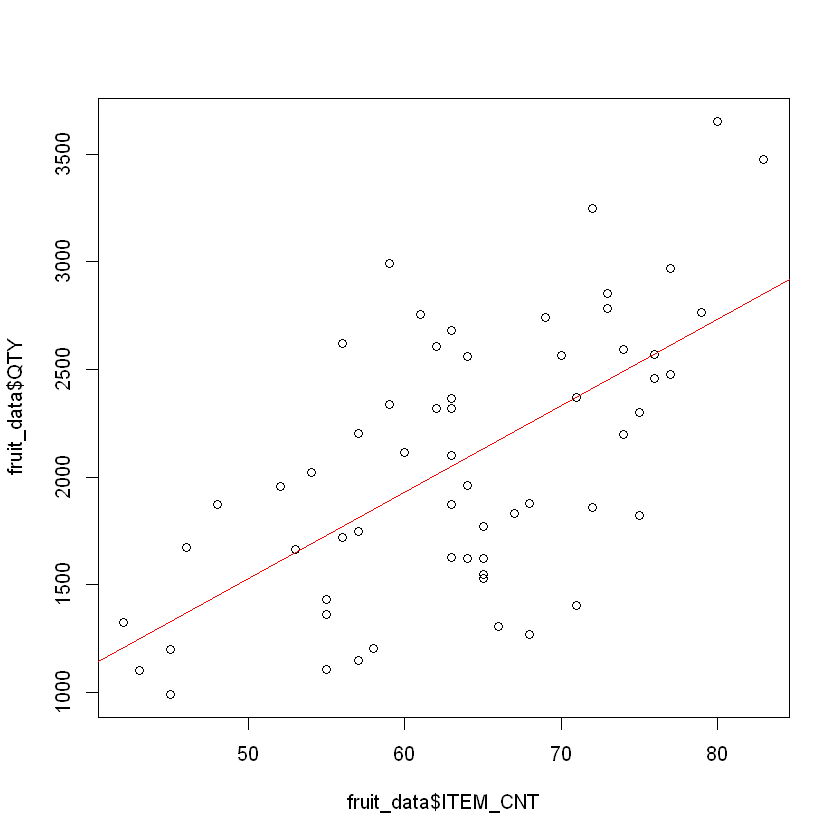

In [209]:
plot(x = fruit_data$ITEM_CNT, y = fruit_data$QTY)
abline(a, col = 2)

In [228]:
fruit_data_2009 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
fruit_data_2010 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
fruit_data_2011 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
fruit_data_2012 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
fruit_data_2013 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

fruit_data_2009

YM,MAXTEMP,QTY
200901,4,990
200902,9,1199
200903,12,1102
200904,19,1326
200905,25,1672
200906,27,1875
200907,28,1663
200908,29,1957
200909,27,2021
200910,22,1718


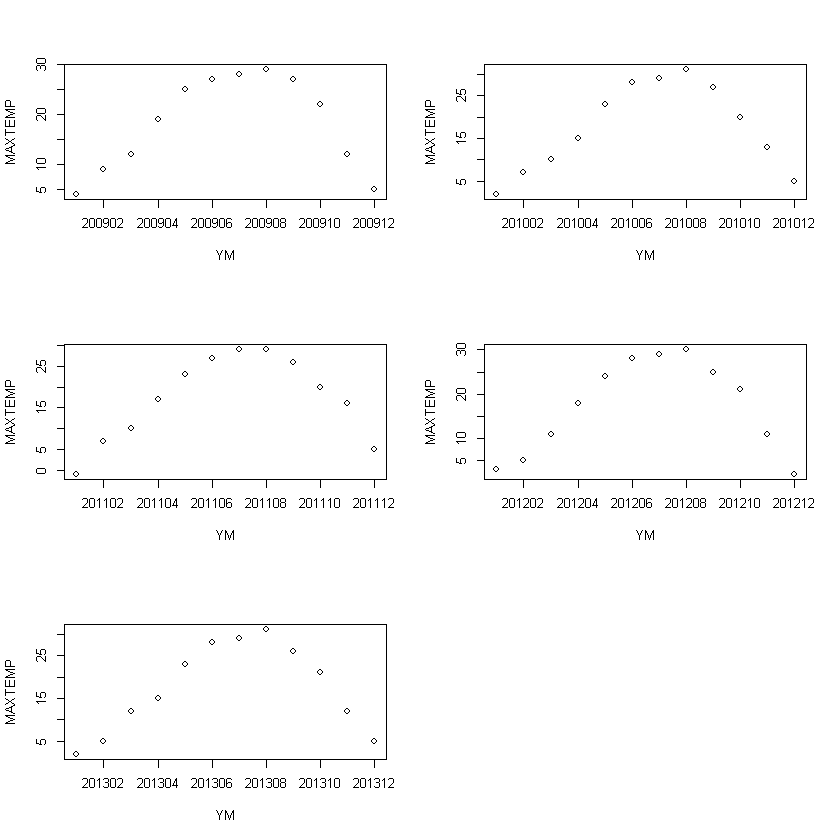

In [227]:
par(mfrow = c(3,2))
plot(fruit_data_2009)
plot(fruit_data_2010)
plot(fruit_data_2011)
plot(fruit_data_2012)
plot(fruit_data_2013)

In [242]:
vitamin_data_2009 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
vitamin_data_2010 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
vitamin_data_2011 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
vitamin_data_2012 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
vitamin_data_2013 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

vitamin_data_t = data.frame(vitamin_data_2009$YM, vitamin_data_2009$MAXTEMP)
vitamin_data_t = cbind(vitamin_data_t, vitamin_data_2010$MAXTEMP, vitamin_data_2011$MAXTEMP, vitamin_data_2012$MAXTEMP,
                       vitamin_data_2013$MAXTEMP)
vitamin_data_t$t_mean = apply(vitamin_data_t[-c(1)], 1, mean)

vitamin_data_ = data.frame(vitamin_data_2009$YM, vitamin_data_2009$QTY)
vitamin_data_ = cbind(vitamin_data_, vitamin_data_2010$QTY, vitamin_data_2011$QTY, vitamin_data_2012$QTY, vitamin_data_2013$QTY)

vitamin_data_$mean = apply(vitamin_data_[-c(1)], 1, mean)
vitamin_data_ = cbind(vitamin_data_, vitamin_data_t$t_mean)
colnames(vitamin_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')

vitamin_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
200901,27,226,581,481,432,349.4,2.0
200902,29,185,691,441,447,358.6,6.6
200903,67,229,452,545,623,383.2,11.0
200904,60,326,511,659,1089,529.0,16.8
200905,74,445,660,771,1524,694.8,23.6
200906,84,438,1088,776,978,672.8,27.6
200907,61,387,992,893,1036,673.8,28.8
200908,63,599,1022,1338,1155,835.4,30.0
200909,56,728,991,792,822,677.8,26.2
200910,50,916,734,1222,730,730.4,20.8


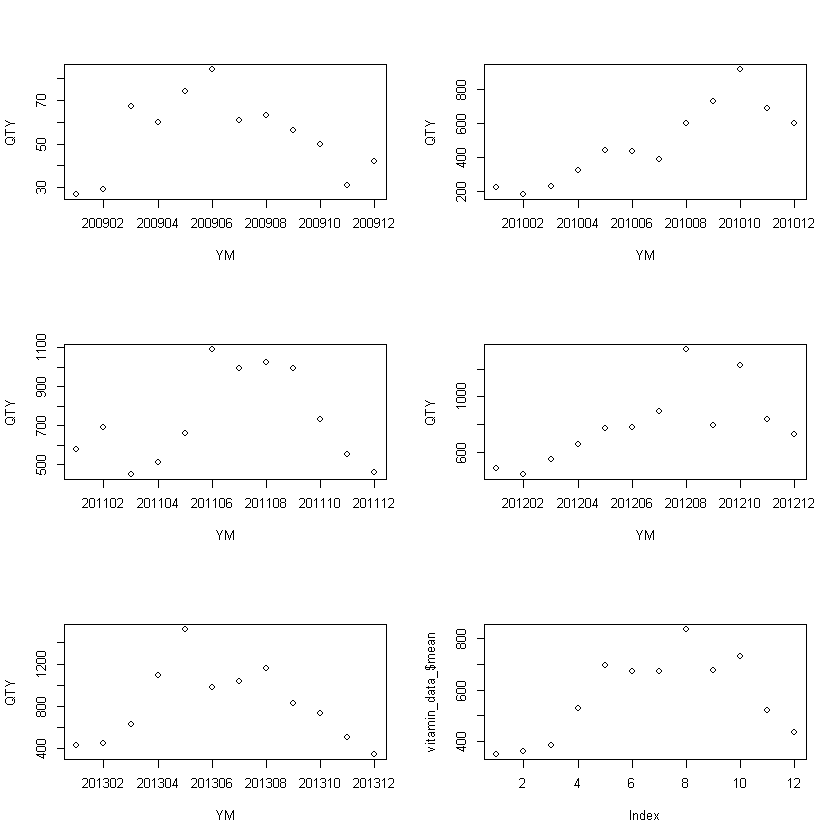

In [93]:
par(mfrow = c(3, 2))
plot(vitamin_data_2009)
plot(vitamin_data_2010)
plot(vitamin_data_2011)
plot(vitamin_data_2012)
plot(vitamin_data_2013)
plot(vitamin_data_$mean)

In [241]:
tea_data_2009 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
tea_data_2010 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
tea_data_2011 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
tea_data_2012 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
tea_data_2013 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

tea_data_t = data.frame(tea_data_2009$YM, tea_data_2009$MAXTEMP)
tea_data_t = cbind(tea_data_t, tea_data_2010$MAXTEMP, tea_data_2011$MAXTEMP, tea_data_2012$MAXTEMP, tea_data_2013$MAXTEMP)
tea_data_t$t_mean = apply(tea_data_t[-c(1)], 1, mean)

tea_data_ = data.frame(tea_data_2009$YM, tea_data_2009$QTY)
tea_data_ = cbind(tea_data_, tea_data_2010$QTY, tea_data_2011$QTY, tea_data_2012$QTY, tea_data_2013$QTY)

tea_data_$mean = apply(tea_data_[-c(1)], 1, mean)
tea_data_ = cbind(tea_data_, tea_data_t$t_mean)
colnames(tea_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')

tea_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
200901,1346,1463,1685,2115,2089,1739.6,2.0
200902,1260,1336,1648,1804,1880,1585.6,6.6
200903,1664,1645,2069,2297,2348,2004.6,11.0
200904,2125,1979,2473,3001,2435,2402.6,16.8
200905,2220,2193,2626,3992,3209,2848.0,23.6
200906,2082,2366,2779,3243,3274,2748.8,27.6
200907,2153,2385,2717,3206,3395,2771.2,28.8
200908,2479,2561,2674,3778,3894,3077.2,30.0
200909,2394,2222,2879,2965,3708,2833.6,26.2
200910,2116,2276,2535,3090,3413,2686.0,20.8


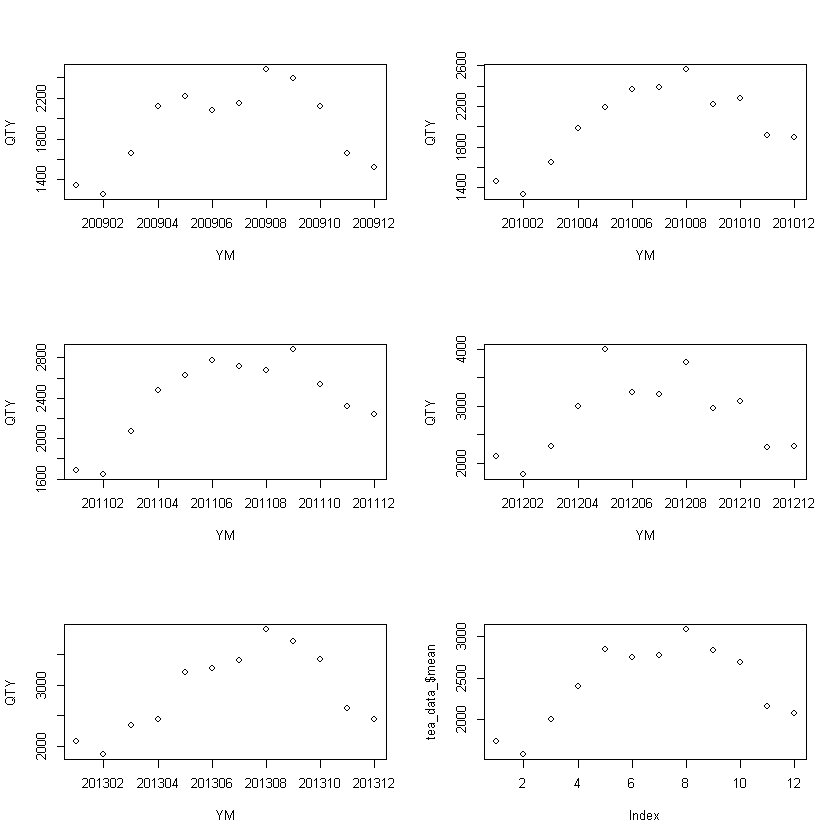

In [94]:
par(mfrow = c(3, 2))
plot(tea_data_2009)
plot(tea_data_2010)
plot(tea_data_2011)
plot(tea_data_2012)
plot(tea_data_2013)
plot(tea_data_$mean)

In [231]:
fruit_data_2009$YM = seq(1:12)
fruit_data_2010$YM = seq(1:12)
fruit_data_2011$YM = seq(1:12)
fruit_data_2012$YM = seq(1:12)
fruit_data_2013$YM = seq(1:12)

fruit_data_t = data.frame(fruit_data_2009$YM, fruit_data_2009$MAXTEMP)
fruit_data_t = cbind(fruit_data_t, fruit_data_2010$MAXTEMP, fruit_data_2011$MAXTEMP, fruit_data_2012$MAXTEMP, fruit_data_2013$MAXTEMP)
fruit_data_t$t_mean = apply(fruit_data_t[-c(1)], 1, mean)

fruit_data_ = data.frame(fruit_data_2009$YM, fruit_data_2009$QTY)
fruit_data_ = cbind(fruit_data_, fruit_data_2010$QTY, fruit_data_2011$QTY, fruit_data_2012$QTY, fruit_data_2013$QTY)

fruit_data_

fruit_data_2009.YM,fruit_data_2009.QTY,fruit_data_2010$QTY,fruit_data_2011$QTY,fruit_data_2012$QTY,fruit_data_2013$QTY
1,990,1106,1268,1402,1627
2,1199,1361,1528,1859,1624
3,1102,1432,1874,2566,2103
4,1326,1750,2200,2475,2117
5,1672,2204,3247,3653,2606
6,1875,2366,2783,3474,2621
7,1663,2681,2593,2568,2336
8,1957,2321,2765,2854,2755
9,2021,1963,2971,2744,2992
10,1718,2321,2459,2369,2563


In [232]:
fruit_data_$mean = apply(fruit_data_[-c(1)], 1, mean)
fruit_data_ = cbind(fruit_data_, fruit_data_t$t_mean)
colnames(fruit_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')
fruit_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
1,990,1106,1268,1402,1627,1278.6,2.0
2,1199,1361,1528,1859,1624,1514.2,6.6
3,1102,1432,1874,2566,2103,1815.4,11.0
4,1326,1750,2200,2475,2117,1973.6,16.8
5,1672,2204,3247,3653,2606,2676.4,23.6
6,1875,2366,2783,3474,2621,2623.8,27.6
7,1663,2681,2593,2568,2336,2368.2,28.8
8,1957,2321,2765,2854,2755,2530.4,30.0
9,2021,1963,2971,2744,2992,2538.2,26.2
10,1718,2321,2459,2369,2563,2286.0,20.8


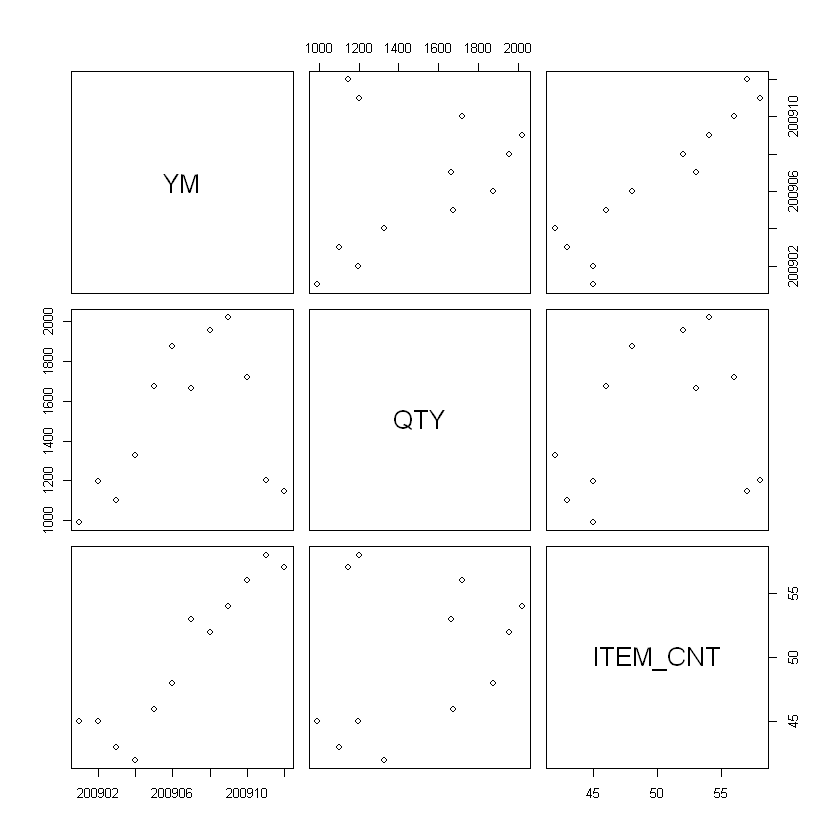

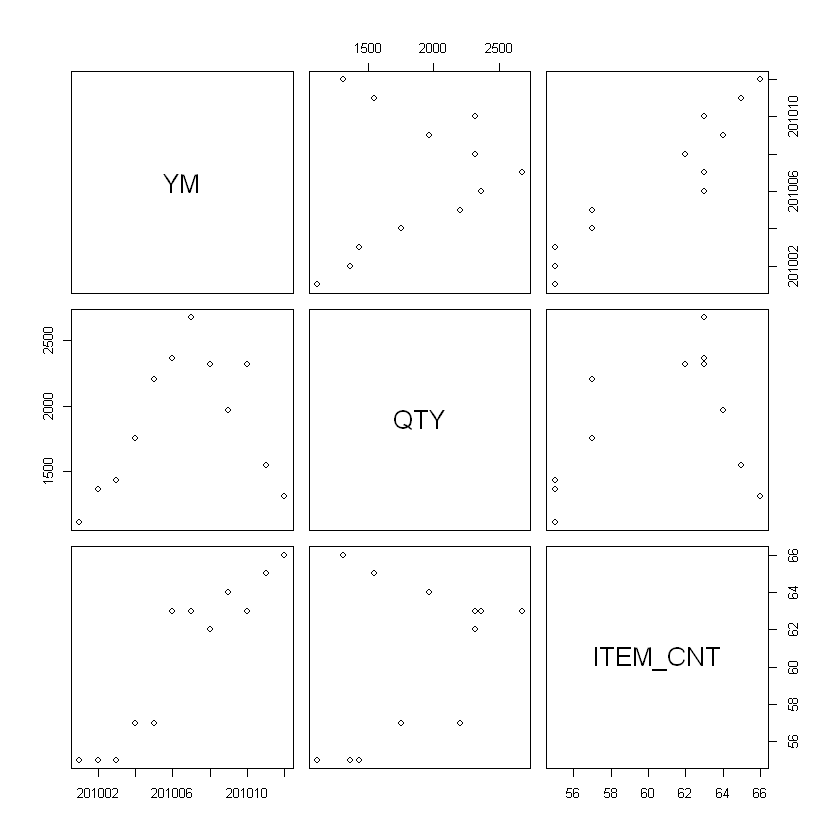

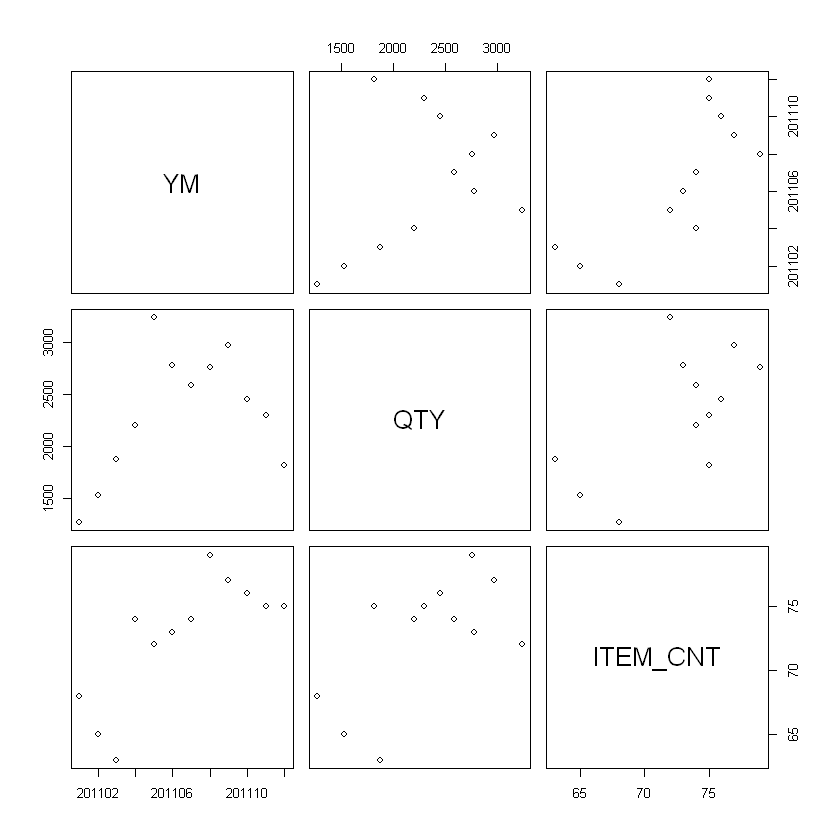

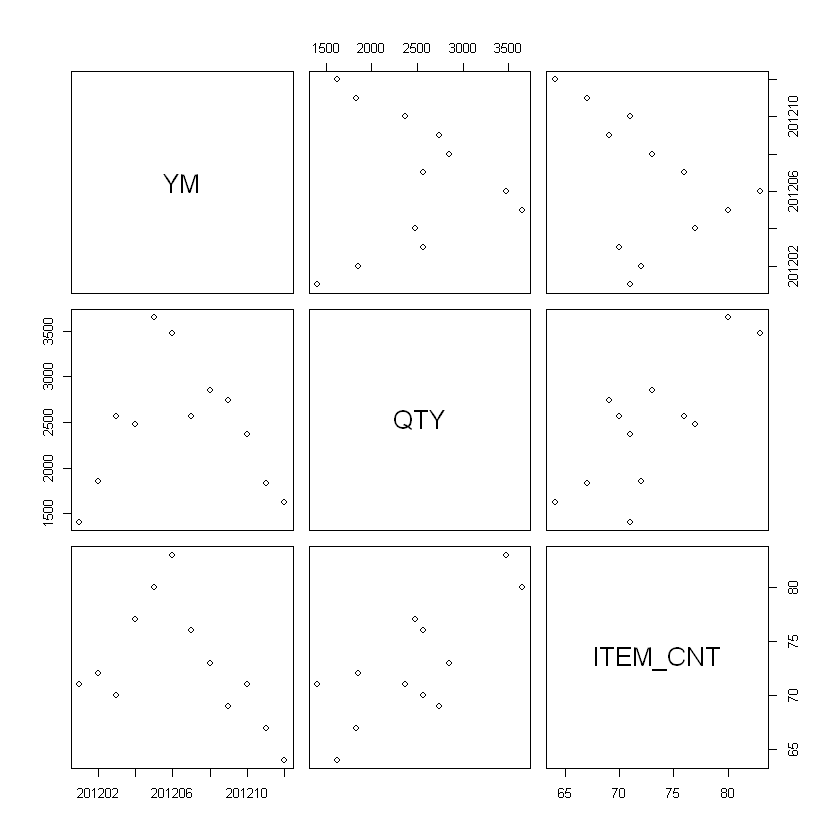

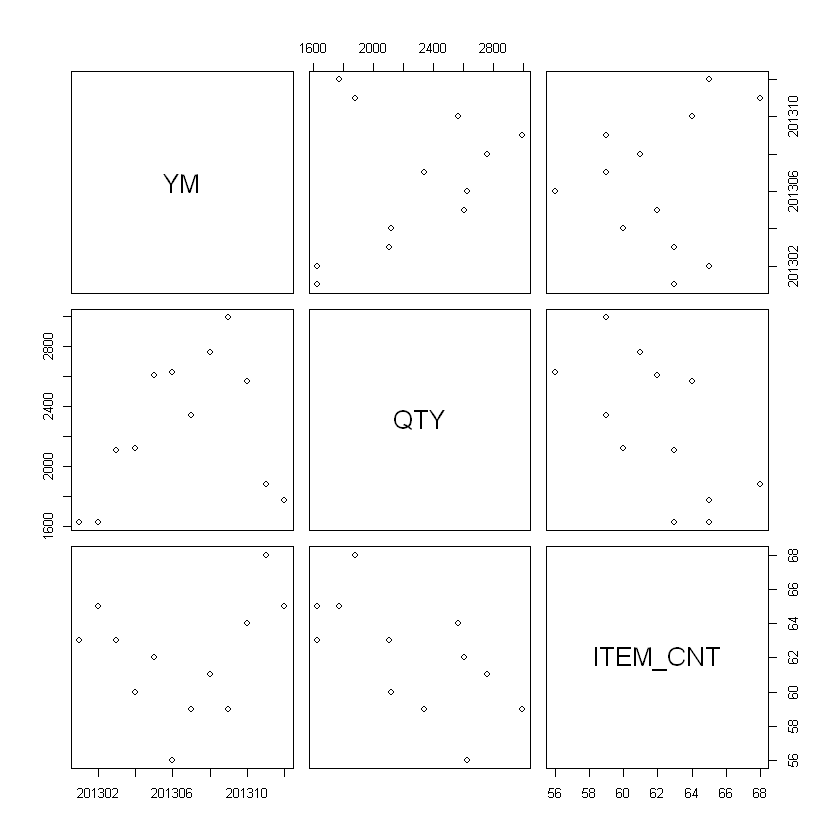

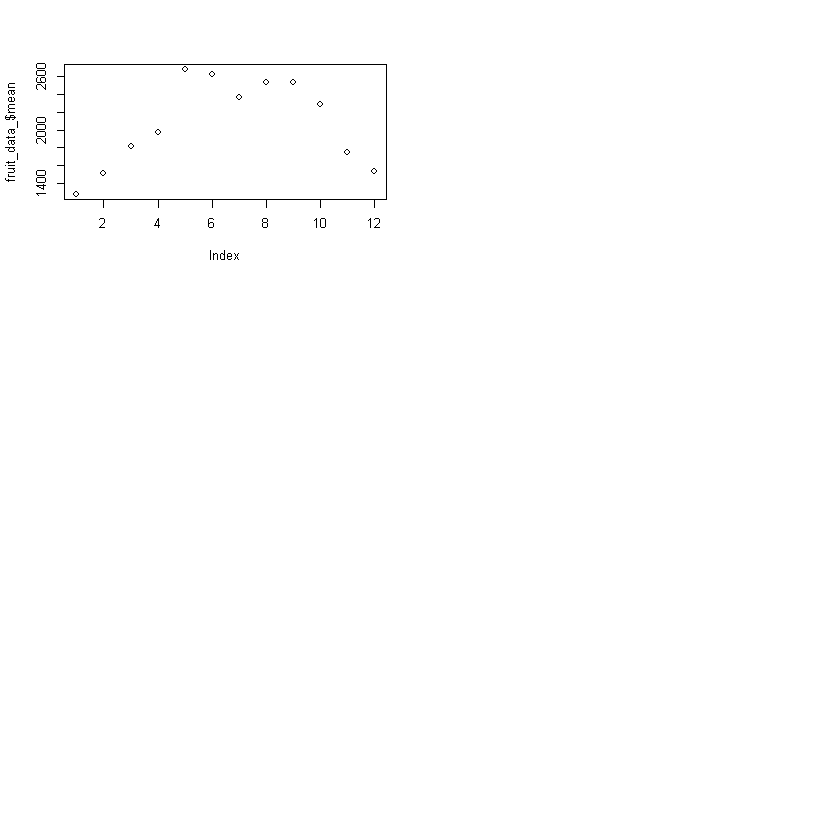

In [195]:
par(mfrow = c(3, 2))
plot(fruit_data_2009)
plot(fruit_data_2010)
plot(fruit_data_2011)
plot(fruit_data_2012)
plot(fruit_data_2013)
plot(fruit_data_$mean)

In [243]:
fruit_data_1 = fruit_data_[-c(2:6)]
fruit_data_1$group = 'fruit_temp'
vitamin_data_1 = vitamin_data_[-c(2:6)]
vitamin_data_1$group = 'vitamin_temp'
tea_data_1 = tea_data_[-c(2:6)]
tea_data_1$group = 'tea_temp'
data_month = rbind(fruit_data_1, vitamin_data_1, tea_data_1)
head(data_month)

M,QTY_mean,Temp_mean,group
1,1278.6,2.0,fruit_temp
2,1514.2,6.6,fruit_temp
3,1815.4,11.0,fruit_temp
4,1973.6,16.8,fruit_temp
5,2676.4,23.6,fruit_temp
6,2623.8,27.6,fruit_temp


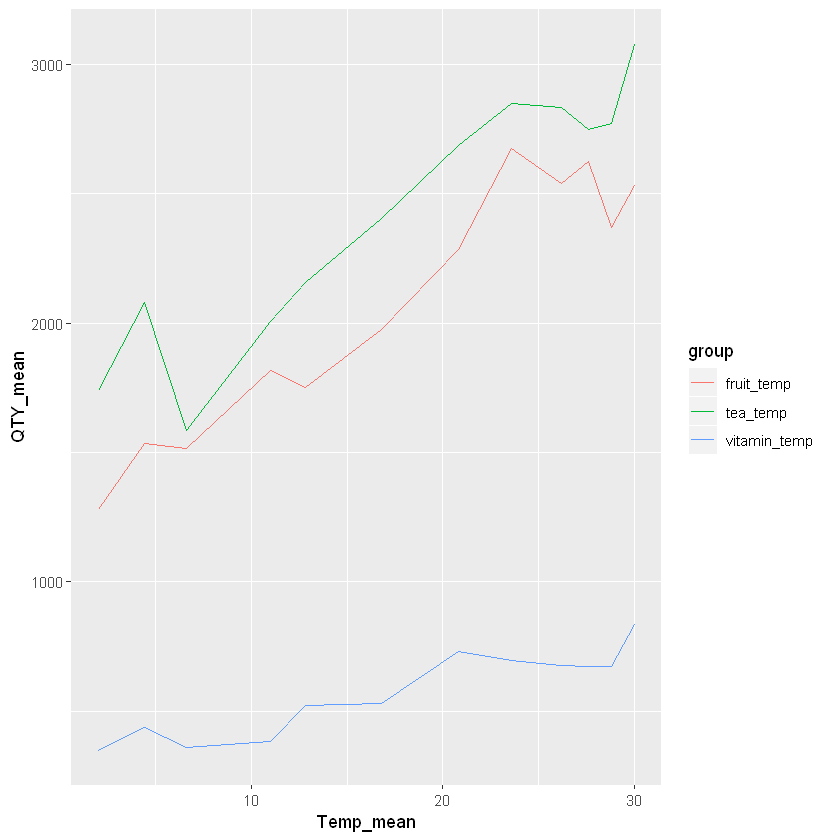

In [247]:
ggplot(data = data_month) +
    geom_line(aes(x = Temp_mean, y = QTY_mean, group = group, color = group), linetype = 1)

In [164]:
t.test(fruit_data_1$mean, tea_data_1$mean)


	Welch Two Sample t-test

data:  fruit_data_1$mean and tea_data_1$mean
t = -1.6898, df = 21.999, p-value = 0.1052
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -750.1909   76.5576
sample estimates:
mean of x mean of y 
 2074.217  2411.033 


In [161]:
oneway.test(formula = mean ~ group, data = data_month, var.equal = FALSE)


	One-way analysis of means (not assuming equal variances)

data:  mean and group
F = 112, num df = 2.000, denom df = 17.428, p-value = 1.129e-10


In [162]:
bartlett.test(mean ~ group, data = data_month)


	Bartlett test of homogeneity of variances

data:  mean by group
Bartlett's K-squared = 11.969, df = 2, p-value = 0.002517
